<a href="https://colab.research.google.com/github/Extremeer/simpEnv/blob/main/example_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SimplerEnv: Simulated Manipulation Policy Evaluation for Real-World Robots

- Project page: <https://simpler-env.github.io/>
- Code: <https://github.com/simpler-env/SimplerEnv>

## Installation


In [1]:
#@title [!Important]Please use a GPU runtime.
!nvidia-smi

Sat Sep 13 03:44:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# @title Install vulkan for rendering
!apt-get install -yqq --no-install-recommends libvulkan-dev vulkan-tools
# below fixes some bugs introduced by some recent Colab changes
!mkdir -p /usr/share/vulkan/icd.d
!wget -q -P /usr/share/vulkan/icd.d https://raw.githubusercontent.com/haosulab/ManiSkill/main/docker/nvidia_icd.json
!wget -q -O /usr/share/glvnd/egl_vendor.d/10_nvidia.json https://raw.githubusercontent.com/haosulab/ManiSkill/main/docker/10_nvidia.json

Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../libvulkan1_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan1:amd64 (1.3.204.1-2) ...
Selecting previously unselected package libvulkan-dev:amd64.
Preparing to unpack .../libvulkan-dev_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan-dev:amd64 (1.3.204.1-2) ...
Selecting previously unselected package vulkan-tools.
Preparing to unpack .../vulkan-tools_1.3.204.0+dfsg1-1_amd64.deb ...
Unpacking vulkan-tools (1.3.204.0+dfsg1-1) ...
Setting up libvulkan1:amd64 (1.3.204.1-2) ...
Setting up libvulkan-dev:amd64 (1.3.204.1-2) ...
Setting up vulkan-tools (1.3.204.0+dfsg1-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_opencl.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_ze

In [3]:
# @title Make sure vulkan is installed correctly
!vulkaninfo | head -n 5

'DISPLAY' environment variable not set... skipping surface info
error: XDG_RUNTIME_DIR not set in the environment.
VULKANINFO

Vulkan Instance Version: 1.3.204


In [1]:
# @title Install Real2Sim
!pip install numpy==1.24.4
!pip install orbax-checkpoint==0.4.4
!pip install scipy==1.12.0
!pip install keras==2.15.0
!pip install tensorflow==2.15.1
!git clone https://github.com/simpler-env/ManiSkill2_real2sim.git
!pip install -e ./ManiSkill2_real2sim
!git clone https://github.com/simpler-env/SimplerEnv.git
!pip install -e ./SimplerEnv
!mkdir ./SimplerEnv/checkpoints

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 w

  Using cached numpy-2.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.0 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18

  Using cached tensorflow-2.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached tensorflow-2.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.3
    Uninstalling ml_dtypes-0.5.3:
      Successfully uninstalled ml_dtypes-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.1 which is incompatible.
tensorflow-text 2.18.1 requires tensorf

In [2]:
#@title [Optional]Install RT-1 dependencies
! pip install --quiet tf_agents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 15.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.5.0 requires typing-extensions>=4.10.0; python_version < "3.14", but you have typing-extensions 4.5.0 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.1 which is incompatible.
fastapi 0.116.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
google-genai 1.25.0 requires typi

In [3]:
#@title [Optional]Install Octo dependencies
!git clone https://github.com/octo-models/octo
!cd ./octo && git checkout 653c54acde686fde619855f2eac0dd6edad7116b && cd ..
!pip install -e ./octo
!pip install --upgrade "jax[cuda12_pip]==0.4.20" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html --no-deps
!pip install --upgrade "jaxlib[cuda12_pip]==0.4.20" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html --no-deps
!pip install jaxlib==0.4.20+cuda12.cudnn89
!pip install distrax==0.1.5 "einops>= 0.6.1"

Cloning into 'octo'...
remote: Enumerating objects: 7382, done.
remote: Counting objects: 100% (1064/1064), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 7382 (delta 981), reused 938 (delta 938), pack-reused 6318 (from 1)
Receiving objects: 100% (7382/7382), 23.75 MiB | 18.72 MiB/s, done.
Resolving deltas: 100% (4768/4768), done.
Note: switching to '653c54acde686fde619855f2eac0dd6edad7116b'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 653c54a Merge pull request #31 from octo-models/

In [4]:
# @title Install other requirements
!pip install --quiet mediapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.7 MB/s eta 0:00:00


In [5]:
# @title [Important]Post Installation

# run this so local pip installs are recognized
import site
site.main()

## Create a Simulated Environment and Take Random Actions

In [6]:
import simpler_env
from simpler_env.utils.env.observation_utils import get_image_from_maniskill2_obs_dict
import mediapy
import sapien.core as sapien

task_name = "google_robot_pick_coke_can"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)
# Colab GPU does not supoort denoiser
sapien.render_config.rt_use_denoiser = False
obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

frames = []
done, truncated = False, False
while not (done or truncated):
   # action[:3]: delta xyz; action[3:6]: delta rotation in axis-angle representation;
   # action[6:7]: gripper (the meaning of open / close depends on robot URDF)
   image = get_image_from_maniskill2_obs_dict(env, obs)
   action = env.action_space.sample() # replace this with your policy inference
   obs, reward, done, truncated, info = env.step(action)
   frames.append(image)

episode_stats = info.get('episode_stats', {})
print("Episode stats", episode_stats)
mediapy.show_video(frames, fps=10)

/usr/local/lib/python3.11/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_language_instruction to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_language_instruction` for environment variables or `env.get_wrapper_attr('get_language_instruction')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.robot_uid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.robot_uid` for environment variables or `env.get_wrapper_attr('robot_uid')` that will search the reminding wrappers.
  logger.warn(


Reset info {'scene_name': 'google_pick_coke_can_1_v4', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': 'recolor_tabletop_visual_matching_1', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/google_coke_can_real_eval_1.png', 'rgb_overlay_cameras': ['overhead_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'model_id': 'opened_coke_can', 'model_scale': 1.0, 'distractor_model_ids': None, 'distractor_model_scales': None, 'obj_init_pose_wrt_robot_base': Pose([0.587925, -0.0238302, 0.840576], [0.707052, -0.0081018, -0.01162, -0.70702]), 'orientation': 'laid_vertically'}
Instruction pick coke can
Episode stats OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])


## Run Inference on Simulated Environments

In [7]:
# @title Setup

import os
import numpy as np
import simpler_env
from simpler_env.utils.env.observation_utils import get_image_from_maniskill2_obs_dict
import mediapy


RT_1_CHECKPOINTS = {
    "rt_1_x": "rt_1_x_tf_trained_for_002272480_step",
    "rt_1_400k": "rt_1_tf_trained_for_000400120",
    "rt_1_58k": "rt_1_tf_trained_for_000058240",
    "rt_1_1k": "rt_1_tf_trained_for_000001120",
}


def get_rt_1_checkpoint(name, ckpt_dir="./SimplerEnv/checkpoints"):
  assert name in RT_1_CHECKPOINTS, name
  ckpt_name = RT_1_CHECKPOINTS[name]
  ckpt_path = os.path.join(ckpt_dir, ckpt_name)
  if not os.path.exists(ckpt_path):
    if name == "rt_1_x":
      !gsutil -m cp -r gs://gdm-robotics-open-x-embodiment/open_x_embodiment_and_rt_x_oss/{ckpt_name}.zip {ckpt_dir}
      !unzip {ckpt_dir}/{ckpt_name}.zip -d {ckpt_dir}
    else:
      !gsutil -m cp -r gs://gdm-robotics-open-x-embodiment/open_x_embodiment_and_rt_x_oss/{ckpt_name} {ckpt_dir}
  return ckpt_path

In [8]:
# @title Select your model and environment

task_name = "google_robot_pick_coke_can"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'google_pick_coke_can_1_v4', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': 'recolor_tabletop_visual_matching_1', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/google_coke_can_real_eval_1.png', 'rgb_overlay_cameras': ['overhead_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'model_id': 'opened_coke_can', 'model_scale': 1.0, 'distractor_model_ids': None, 'distractor_model_scales': None, 'obj_init_pose_wrt_robot_base': Pose([0.587925, -0.0238302, 0.840576], [0.707052, -0.0081018, -0.01162, -0.70702]), 'orientation': 'laid_vertically'}
Instruction pick coke can


In [9]:
# @title Select your model and environment
model_name = "rt_1_x" # @param ["rt_1_x", "rt_1_400k", "rt_1_58k", "rt_1_1k", "octo-base", "octo-small"]

if "rt_1" in model_name:
  from simpler_env.policies.rt1.rt1_model import RT1Inference

  ckpt_path = get_rt_1_checkpoint(model_name)
  model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
elif "octo" in model_name:
  from simpler_env.policies.octo.octo_model import OctoInference

  model = OctoInference(model_type=model_name, policy_setup=policy_setup, init_rng=0)
else:
  raise ValueError(model_name)


/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


Copying gs://gdm-robotics-open-x-embodiment/open_x_embodiment_and_rt_x_oss/rt_1_x_tf_trained_for_002272480_step.zip...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

/ [1/1 files][738.7 MiB/738.7 MiB] 100% Done                                    
Operation completed over 1 objects/738.7 MiB.                                    
Archive:  ./SimplerEnv/checkpoints/rt_1_x_tf_trained_for_002272480_step.zip
   creating: ./SimplerEnv/checkpoints/rt_1_x_tf_trained_for_002272480_step/
  inflating: ./SimplerEnv/checkpoints/rt_1_x_tf_trained_for_002272480_step/ckpt-2272480.data-00000-of-00001  
  inflating: ./SimplerEnv/checkpoints/rt_1_x_tf_trained_for_002272480_step/fingerprint.pb  
  inflating: ./SimplerEnv/checkpoints/rt_1_x_tf_trained_for_002272480_step/policy_specs.pbtxt  
  inflating: ./SimplerE

In [10]:
#@title Run inference

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
model.reset(instruction)
print(instruction)

image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
images = [image]
predicted_terminated, success, truncated = False, False, False
timestep = 0
while not (predicted_terminated or truncated):
    # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
    raw_action, action = model.step(image)
    predicted_terminated = bool(action["terminate_episode"][0] > 0)
    obs, reward, success, truncated, info = env.step(
        np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
    )
    print(timestep, info)
    # update image observation
    image = get_image_from_maniskill2_obs_dict(env, obs)
    images.append(image)
    timestep += 1

episode_stats = info.get("episode_stats", {})
print(f"Episode success: {success}")

/usr/local/lib/python3.11/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_language_instruction to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_language_instruction` for environment variables or `env.get_wrapper_attr('get_language_instruction')` that will search the reminding wrappers.
  logger.warn(


pick coke can


/usr/local/lib/python3.11/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.robot_uid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.robot_uid` for environment variables or `env.get_wrapper_attr('robot_uid')` that will search the reminding wrappers.
  logger.warn(


0 {'elapsed_steps': 1, 'is_grasped': False, 'consecutive_grasp': False, 'lifted_object': False, 'lifted_object_significantly': False, 'success': False, 'episode_stats': OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])}
1 {'elapsed_steps': 2, 'is_grasped': False, 'consecutive_grasp': False, 'lifted_object': False, 'lifted_object_significantly': False, 'success': False, 'episode_stats': OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])}
2 {'elapsed_steps': 3, 'is_grasped': False, 'consecutive_grasp': False, 'lifted_object': False, 'lifted_object_significantly': False, 'success': False, 'episode_stats': OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])}
3 {'elapsed_steps': 4, 'is_grasped': False, 'consecutive_grasp': False, 'lifted_object': False, 'lifted_object_significantly': False, 'success': False, 'episode_stats': OrderedDict([('n_lift_significant', 0), ('consec_grasp', False)

In [11]:
print(task_name, model_name)
mediapy.show_video(images, fps=10)

google_robot_pick_coke_can rt_1_x


## Gallery

In [12]:
# @markdown RT-1-X close drawer
print(task_name, model_name)
mediapy.show_video(images, fps=10)
# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.

google_robot_pick_coke_can rt_1_x


In [ ]:
# @markdown Octo-base widowx_put_eggplant_in_basket
print(task_name, model_name)
mediapy.show_video(images, fps=10)

google_robot_pick_coke_can rt_1_x


In [22]:
# 导入必要的库
import os
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 依赖库导入完成")


✅ 依赖库导入完成


## 2. 评估配置

⚙️ **配置说明**：
- `n_trials`: 每个任务运行次数（建议先用少量测试）
- `max_episode_steps`: 每个episode最大步数
- `tasks`: 要评估的任务列表
- `models`: 要评估的模型列表
- `save_videos`: 是否保存第一次试验的视频
- `verbose`: 是否显示详细进度信息

In [18]:
# 评估配置
EVAL_CONFIG = {
    "n_trials": 3,  # 每个任务运行次数（建议先用少量测试）
    "max_episode_steps": 80,  # 最大步数
    "tasks": [
        "google_robot_pick_coke_can",
        "google_robot_move_near",
        # "google_robot_open_drawer",  # 可以取消注释添加更多任务
        # "google_robot_close_drawer"
    ],
    "models": ["rt_1_x"],  # 先测试一个模型，可以添加 "octo-base"
    "save_videos": True,   # 是否保存视频
    "save_results": True,  # 是否保存结果
    "verbose": True        # 详细输出
}

print("📋 评估配置:")
for key, value in EVAL_CONFIG.items():
    print(f"  {key}: {value}")

# 计算总评估次数
total_evaluations = len(EVAL_CONFIG["models"]) * len(EVAL_CONFIG["tasks"]) * EVAL_CONFIG["n_trials"]
print(f"\n🎯 总评估次数: {total_evaluations}")
print(f"⏱️  预计耗时: {total_evaluations * 2:.0f}-{total_evaluations * 5:.0f}分钟")
print(f"💡 提示: 首次运行建议使用少量试验次数测试")


📋 评估配置:
  n_trials: 3
  max_episode_steps: 80
  tasks: ['google_robot_pick_coke_can', 'google_robot_move_near']
  models: ['rt_1_x']
  save_videos: True
  save_results: True
  verbose: True

🎯 总评估次数: 6
⏱️  预计耗时: 12-30分钟
💡 提示: 首次运行建议使用少量试验次数测试


## 3. 核心评估函数（带进度指示）

🚀 **进度指示系统**：
- **总体进度条**：显示整体评估进度
- **试验进度条**：显示当前模型-任务组合的试验进度  
- **步骤进度条**：显示单次试验的执行步骤
- **实时状态**：成功率、步数、抓取状态等实时更新


In [19]:
# RT-1检查点配置和下载函数
RT_1_CHECKPOINTS = {
    "rt_1_x": "rt_1_x_tf_trained_for_002272480_step",
    "rt_1_400k": "rt_1_tf_trained_for_000400120",
    "rt_1_58k": "rt_1_tf_trained_for_000058240",
    "rt_1_1k": "rt_1_tf_trained_for_000001120",
}

def get_rt_1_checkpoint(name, ckpt_dir="./checkpoints"):
    """获取RT-1检查点路径，如果不存在则下载"""
    assert name in RT_1_CHECKPOINTS, f"Unknown RT-1 model: {name}"
    ckpt_name = RT_1_CHECKPOINTS[name]
    ckpt_path = os.path.join(ckpt_dir, ckpt_name)

    if not os.path.exists(ckpt_path):
        print(f"📥 下载检查点: {ckpt_name}")
        os.makedirs(ckpt_dir, exist_ok=True)
        if name == "rt_1_x":
            !gsutil -m cp -r gs://gdm-robotics-open-x-embodiment/open_x_embodiment_and_rt_x_oss/{ckpt_name}.zip {ckpt_dir}
            !unzip {ckpt_dir}/{ckpt_name}.zip -d {ckpt_dir}
        else:
            !gsutil -m cp -r gs://gdm-robotics-open-x-embodiment/open_x_embodiment_and_rt_x_oss/{ckpt_name} {ckpt_dir}
        print(f"✅ 检查点下载完成")

    return ckpt_path

print("🔧 模型加载函数已定义")

def run_single_episode_with_progress(env, model, task_name, max_steps=80,
                                   save_video=False, trial_num=None, verbose=False):
    """运行单个episode并返回详细结果，带进度指示"""

    # 重置环境
    obs, reset_info = env.reset()
    instruction = env.get_language_instruction()
    model.reset(instruction)

    # 记录详细信息
    episode_data = {
        'task': task_name,
        'instruction': instruction,
        'success': False,
        'truncated': False,
        'total_steps': 0,
        'episode_stats': {}
    }

    image = get_image_from_maniskill2_obs_dict(env, obs)
    images = [image] if save_video else []

    predicted_terminated, success, truncated = False, False, False
    timestep = 0

    # 创建步骤进度条（更紧凑的显示）
    if trial_num is not None and verbose:
        step_pbar = tqdm(
            total=max_steps,
            desc=f"🔄 Trial {trial_num}",
            leave=False,
            position=1,
            ascii=True,
            colour='blue',
            ncols=80  # 限制宽度
        )

    try:
        while not (predicted_terminated or truncated) and timestep < max_steps:
            # 执行动作
            raw_action, action = model.step(image)
            predicted_terminated = bool(action["terminate_episode"][0] > 0)

            obs, reward, success, truncated, info = env.step(
                np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
            )

            # 更新图像
            image = get_image_from_maniskill2_obs_dict(env, obs)
            if save_video:
                images.append(image)

            timestep += 1

            # 更新步骤进度条
            if trial_num is not None and verbose:
                step_pbar.update(1)
                step_pbar.set_postfix({
                    'Succ': '✓' if success else '✗',
                    'Grasp': '✓' if info.get('is_grasped', False) else '✗',
                    'R': f"{reward:.2f}"
                })

    finally:
        # 关闭步骤进度条
        if trial_num is not None and verbose:
            step_pbar.close()

    # 记录最终结果
    episode_data.update({
        'success': success,
        'truncated': truncated,
        'total_steps': timestep,
        'episode_stats': info.get('episode_stats', {}),
        'images': images if save_video else None
    })

    return episode_data

print("🎯 单次评估函数（带进度）已定义")

def evaluate_with_progress(model_name, task_name, n_trials=10, save_videos=False, verbose=True):
    """带详细进度指示的模型评估函数"""

    if verbose:
        print(f"\n🚀 开始评估: {model_name} 在 {task_name}")
        print("=" * 70)

    # 1. 设置环境
    if verbose:
        print("⚙️  设置环境...")

    # 清理之前的环境
    if 'env' in globals():
        try:
            env.close()
            del env
        except:
            pass

    env = simpler_env.make(task_name)
    sapien.render_config.rt_use_denoiser = False

    # 2. 设置模型
    if verbose:
        print("🤖 加载模型...")

    policy_setup = "google_robot" if "google" in task_name else "widowx_bridge"

    try:
        if "rt_1" in model_name:
            from simpler_env.policies.rt1.rt1_model import RT1Inference
            ckpt_path = get_rt_1_checkpoint(model_name)
            if verbose:
                print(f"📂 加载RT-1: {os.path.basename(ckpt_path)}")
            model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
        elif "octo" in model_name:
            from simpler_env.policies.octo.octo_model import OctoInference
            if verbose:
                print(f"📂 加载Octo: {model_name}")
            model = OctoInference(model_type=model_name, policy_setup=policy_setup, init_rng=0)
        else:
            raise ValueError(f"Unknown model: {model_name}")

        if verbose:
            print("✅ 模型加载完成")

    except Exception as e:
        if verbose:
            print(f"❌ 模型加载失败: {e}")
        env.close()
        raise

    # 3. 运行多次试验
    if verbose:
        print(f"\\n🎯 开始 {n_trials} 次试验...")

    results = []
    success_count = 0

    # 创建试验进度条（主要进度条）
    trial_pbar = tqdm(
        range(n_trials),
        desc=f"🔄 {model_name[:12]} on {task_name.split('_')[-2:]}",
        position=0,
        ascii=True,
        colour='green',
        leave=True,
        ncols=100
    )

    for trial in trial_pbar:
        try:
            # 运行单次试验
            episode_data = run_single_episode_with_progress(
                env, model, task_name,
                max_steps=EVAL_CONFIG["max_episode_steps"],
                save_video=save_videos and trial == 0,
                trial_num=trial + 1,
                verbose=verbose
            )

            results.append(episode_data)

            if episode_data['success']:
                success_count += 1
                status = "✓"
            else:
                status = "✗"

            # 实时更新进度条信息
            success_rate = success_count / (trial + 1)
            trial_pbar.set_postfix({
                'Status': status,
                'Success': f"{success_count}/{trial+1}",
                'Rate': f"{success_rate:.1%}",
                'Steps': f"{episode_data.get('total_steps', 0):02d}"
            })

        except Exception as e:
            error_msg = str(e)[:25] + "..." if len(str(e)) > 25 else str(e)
            trial_pbar.set_postfix({'Status': f"ERROR: {error_msg}"})

            # 记录失败的试验
            failed_episode = {
                'task': task_name,
                'success': False,
                'error': str(e),
                'total_steps': 0
            }
            results.append(failed_episode)

            if verbose:
                print(f"\\n⚠️  Trial {trial + 1} 出错: {e}")

    # 关闭进度条
    trial_pbar.close()

    # 4. 计算统计信息
    success_rate = success_count / n_trials
    valid_results = [r for r in results if 'total_steps' in r and r['total_steps'] > 0]
    avg_steps = np.mean([r['total_steps'] for r in valid_results]) if valid_results else 0

    summary = {
        'model': model_name,
        'task': task_name,
        'n_trials': n_trials,
        'success_count': success_count,
        'success_rate': success_rate,
        'avg_steps': avg_steps,
        'results': results
    }

    # 5. 显示结果
    if verbose:
        print(f"\\n📊 评估完成!")
        print(f"✅ 成功: {success_count}/{n_trials} ({success_rate:.1%})")
        print(f"📈 平均步数: {avg_steps:.1f}")
        print("-" * 50)

    # 清理环境
    try:
        env.close()
    except:
        pass

    return summary

print("🔄 带进度指示的评估函数已定义")


🔧 模型加载函数已定义
🎯 单次评估函数（带进度）已定义
🔄 带进度指示的评估函数已定义


## 4. 🚀 执行系统性评估

**重要提示**：
- 首次运行建议使用少量试验次数（如3次）进行测试
- 评估过程中会显示多层进度条：总体进度 → 试验进度 → 步骤进度
- 如果卡住不动，请检查GPU内存和网络连接
- 可以随时中断评估（Ctrl+C），已完成的结果会被保存


In [23]:
# 执行系统性评估（带详细进度指示）
print("🚀 开始系统性评估...")
print(f"📋 配置: {len(EVAL_CONFIG['models'])} 模型 × {len(EVAL_CONFIG['tasks'])} 任务 × {EVAL_CONFIG['n_trials']} 试验")
print("=" * 80)

# 存储所有评估结果
all_evaluation_results = []
start_time = time.time()

# 计算总任务数（模型-任务组合）
total_tasks = len(EVAL_CONFIG["models"]) * len(EVAL_CONFIG["tasks"])
task_counter = 0

# 创建总体进度条
overall_pbar = tqdm(
    total=total_tasks,
    desc="🎯 Overall Progress",
    position=0,
    ascii=True,
    colour='red',
    ncols=120
)

try:
    for model_name in EVAL_CONFIG["models"]:
        for task_name in EVAL_CONFIG["tasks"]:
            task_counter += 1

            # 更新总体进度条
            task_short = task_name.replace('google_robot_', '').replace('_', ' ')
            overall_pbar.set_description(f"🎯 Task {task_counter}/{total_tasks}: {model_name} on {task_short}")

            try:
                # 执行单个模型-任务评估
                result = evaluate_with_progress(
                    model_name=model_name,
                    task_name=task_name,
                    n_trials=EVAL_CONFIG["n_trials"],
                    save_videos=EVAL_CONFIG["save_videos"],
                    verbose=EVAL_CONFIG["verbose"]
                )

                all_evaluation_results.append(result)

                # 更新总体进度条状态
                overall_pbar.set_postfix({
                    'Last Success': f"{result['success_rate']:.1%}",
                    'Avg Steps': f"{result['avg_steps']:.0f}",
                    'Status': '✅'
                })

            except Exception as e:
                print(f"\\n❌ 评估 {model_name} 在 {task_name} 时出错: {e}")

                # 记录失败的评估
                failed_result = {
                    'model': model_name,
                    'task': task_name,
                    'success_rate': 0.0,
                    'error': str(e),
                    'n_trials': EVAL_CONFIG["n_trials"],
                    'success_count': 0
                }
                all_evaluation_results.append(failed_result)

                overall_pbar.set_postfix({'Status': '❌ ERROR'})

            # 更新总体进度
            overall_pbar.update(1)

            # 短暂休息，避免系统过载
            time.sleep(1)

except KeyboardInterrupt:
    print("\\n⚠️  评估被用户中断")
    overall_pbar.set_postfix({'Status': '⚠️  INTERRUPTED'})

finally:
    overall_pbar.close()

total_time = time.time() - start_time

# 显示评估完成信息
print(f"\\n🎉 评估完成!")
print(f"⏱️  总耗时: {total_time/60:.1f} 分钟")
print(f"📊 完成评估: {len(all_evaluation_results)} 个模型-任务组合")
print(f"✅ 成功评估: {len([r for r in all_evaluation_results if 'error' not in r])} 个")
print(f"❌ 失败评估: {len([r for r in all_evaluation_results if 'error' in r])} 个")

if all_evaluation_results:
    avg_success_rate = np.mean([r.get('success_rate', 0) for r in all_evaluation_results])
    print(f"📈 平均成功率: {avg_success_rate:.1%}")
else:
    print("⚠️  没有完成任何评估")


🚀 开始系统性评估...
📋 配置: 1 模型 × 2 任务 × 3 试验


🎯 Task 1/2: rt_1_x on pick coke can:   0%|                                                       | 0/2 [00:00<?, ?it/s]


🚀 开始评估: rt_1_x 在 google_robot_pick_coke_can
⚙️  设置环境...
🤖 加载模型...
📥 下载检查点: rt_1_x_tf_trained_for_002272480_step
Copying gs://gdm-robotics-open-x-embodiment/open_x_embodiment_and_rt_x_oss/rt_1_x_tf_trained_for_002272480_step.zip...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

/ [1/1 files][738.7 MiB/738.7 MiB] 100% Done                                    
Operation completed over 1 objects/738.7 MiB.                                    
Archive:  ./checkpoints/rt_1_x_tf_trained_for_002272480_step.zip
   creating: ./checkpoints/rt_1_x_tf_trained_for_002272480_step/
  inflating: ./checkpoints/rt_1_x_tf_trained_for_002272480_step/ckpt-2272480.data-00000-of-00001  
  inflating: ./checkpoints/rt_1_x_tf_trained_for_002272480_step/fingerprint.pb  
  inflating: ./checkpoints/rt_1_x_tf_trained_for_0

✅ 模型加载完成
\n🎯 开始 3 次试验...


🔄 Trial 1: 100%|######| 80/80 [05:20<00:00,  3.93s/it, Succ=✗, Grasp=✗, R=0.00]
🔄 rt_1_x on ['coke', 'can']:  33%|3| 1/3 [05:28<10:57, 328.90s/it, Status=✗, Success=0/1, Rate=0.0%
🔄 Trial 2:  42%|##5   | 34/80 [02:17<03:11,  4.17s/it, Succ=✓, Grasp=✓, R=1.00]
🔄 rt_1_x on ['coke', 'can']:  67%|6| 2/3 [07:51<03:39, 219.30s/it, Status=✓, Success=1/2, Rate=50.0
🔄 Trial 3:  32%|#9    | 26/80 [01:44<03:30,  3.89s/it, Succ=✓, Grasp=✓, R=1.00]
🔄 rt_1_x on ['coke', 'can']: 100%|#| 3/3 [09:39<00:00, 193.25s/it, Status=✓, Success=2/3, Rate=66.7


\n📊 评估完成!
✅ 成功: 2/3 (66.7%)
📈 平均步数: 46.7
--------------------------------------------------


🎯 Task 2/2: rt_1_x on move near:  50%|##5  | 1/2 [10:34<10:33, 633.19s/it, Last Success=66.7%, Avg Steps=47, Status=✅]


🚀 开始评估: rt_1_x 在 google_robot_move_near
⚙️  设置环境...
🤖 加载模型...
📂 加载RT-1: rt_1_x_tf_trained_for_002272480_step


✅ 模型加载完成
\n🎯 开始 3 次试验...


🔄 Trial 1:  39%|##3   | 31/80 [01:59<03:11,  3.91s/it, Succ=✓, Grasp=✗, R=1.00]
🔄 rt_1_x on ['move', 'near']:  33%|3| 1/3 [02:08<04:17, 128.87s/it, Status=✓, Success=1/1, Rate=100
🔄 Trial 2: 100%|######| 80/80 [05:16<00:00,  4.10s/it, Succ=✗, Grasp=✗, R=0.00]
🔄 rt_1_x on ['move', 'near']:  67%|6| 2/3 [07:30<04:02, 242.04s/it, Status=✗, Success=1/2, Rate=50.
🔄 Trial 3:  38%|##2   | 30/80 [01:57<03:20,  4.01s/it, Succ=✓, Grasp=✗, R=1.00]
🔄 rt_1_x on ['move', 'near']: 100%|#| 3/3 [09:31<00:00, 190.58s/it, Status=✓, Success=2/3, Rate=66.


\n📊 评估完成!
✅ 成功: 2/3 (66.7%)
📈 平均步数: 47.0
--------------------------------------------------


🎯 Task 2/2: rt_1_x on move near: 100%|#####| 2/2 [20:44<00:00, 622.27s/it, Last Success=66.7%, Avg Steps=47, Status=✅]

\n🎉 评估完成!
⏱️  总耗时: 20.7 分钟
📊 完成评估: 2 个模型-任务组合
✅ 成功评估: 2 个
❌ 失败评估: 0 个
📈 平均成功率: 66.7%


## 5. 📊 结果分析和可视化


📊 评估结果分析
\n📋 详细结果:
 Model          Task  Success Rate  Success Count  Total Trials  Avg Steps
rt_1_x pick coke can          0.67              2             3      46.67
rt_1_x     move near          0.67              2             3      47.00
\n📈 统计信息:
  平均成功率: 66.67%
  最高成功率: 66.67%
  最低成功率: 66.67%
  平均步数: 46.8


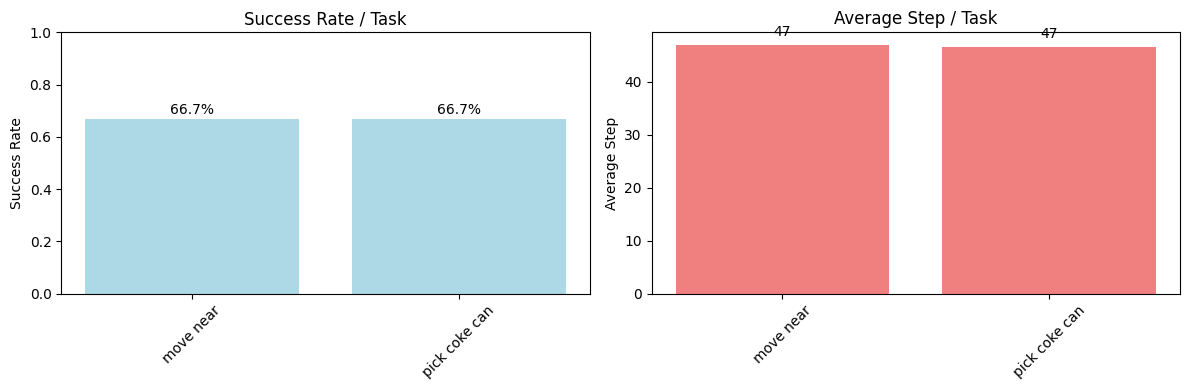

In [26]:
# 分析评估结果
def analyze_results_quick(results):
    """快速分析评估结果"""
    if not results:
        print("❌ 没有评估结果")
        return None

    print("📊 评估结果分析")
    print("=" * 50)

    # 创建结果DataFrame
    df_data = []
    for result in results:
        if 'error' not in result:
            task_short = result['task'].replace('google_robot_', '').replace('_', ' ')
            df_data.append({
                'Model': result['model'],
                'Task': task_short,
                'Success Rate': result['success_rate'],
                'Success Count': result.get('success_count', 0),
                'Total Trials': result.get('n_trials', 0),
                'Avg Steps': result.get('avg_steps', 0)
            })

    if not df_data:
        print("❌ 没有成功的评估结果")
        return None

    df = pd.DataFrame(df_data)

    # 显示结果表格
    print("\\n📋 详细结果:")
    print(df.to_string(index=False, float_format='%.2f'))

    # 统计信息
    print(f"\\n📈 统计信息:")
    print(f"  平均成功率: {df['Success Rate'].mean():.2%}")
    print(f"  最高成功率: {df['Success Rate'].max():.2%}")
    print(f"  最低成功率: {df['Success Rate'].min():.2%}")
    print(f"  平均步数: {df['Avg Steps'].mean():.1f}")

    return df

# 执行分析
results_df = analyze_results_quick(all_evaluation_results)
# 简单可视化
if results_df is not None and len(results_df) > 0:
    plt.figure(figsize=(12, 4))

    # 成功率柱状图
    plt.subplot(1, 2, 1)
    if len(results_df['Task'].unique()) > 1:
        # 按任务显示
        task_success = results_df.groupby('Task')['Success Rate'].mean()
        bars = plt.bar(range(len(task_success)), task_success.values, color='lightblue')
        plt.title('Success Rate / Task')
        plt.ylabel('Success Rate')
        plt.xticks(range(len(task_success)), task_success.index, rotation=45)

        # 添加数值标签
        for i, v in enumerate(task_success.values):
            plt.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')
    else:
        # 单任务，按模型显示
        model_success = results_df.groupby('Model')['Success Rate'].mean()
        bars = plt.bar(range(len(model_success)), model_success.values, color='lightgreen')
        plt.title('Success Rate / Model')
        plt.ylabel('Success Rate')
        plt.xticks(range(len(model_success)), model_success.index)

        for i, v in enumerate(model_success.values):
            plt.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

    plt.ylim(0, 1)

    # 平均步数
    plt.subplot(1, 2, 2)
    if len(results_df['Task'].unique()) > 1:
        task_steps = results_df.groupby('Task')['Avg Steps'].mean()
        bars = plt.bar(range(len(task_steps)), task_steps.values, color='lightcoral')
        plt.title('Average Step / Task')
        plt.ylabel('Average Step')
        plt.xticks(range(len(task_steps)), task_steps.index, rotation=45)

        for i, v in enumerate(task_steps.values):
            plt.text(i, v + 1, f'{v:.0f}', ha='center', va='bottom')
    else:
        model_steps = results_df.groupby('Model')['Avg Steps'].mean()
        bars = plt.bar(range(len(model_steps)), model_steps.values, color='orange')
        plt.title('Average Step / Model')
        plt.ylabel('Average Step')
        plt.xticks(range(len(model_steps)), model_steps.index)

        for i, v in enumerate(model_steps.values):
            plt.text(i, v + 1, f'{v:.0f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 没有数据可以可视化")



## 6. 💾 保存评估结果


In [25]:
# 保存评估结果
def save_results_simple(results, results_df=None):
    """保存评估结果"""
    if not results:
        print("⚠️ 没有结果可以保存")
        return

    timestamp = time.strftime("%Y%m%d_%H%M%S")

    try:
        # 保存详细结果 (JSON)
        detailed_filename = f"systematic_eval_detailed_{timestamp}.json"

        # 清理结果以便JSON序列化
        clean_results = []
        for result in results:
            clean_result = {k: v for k, v in result.items() if k != 'results'}
            # 添加简化的试验统计
            if 'results' in result:
                episodes = result['results']
                clean_result['trial_summary'] = {
                    'successful_trials': len([e for e in episodes if e.get('success', False)]),
                    'failed_trials': len([e for e in episodes if not e.get('success', False)]),
                    'total_steps_list': [e.get('total_steps', 0) for e in episodes]
                }
            clean_results.append(clean_result)

        with open(detailed_filename, 'w', encoding='utf-8') as f:
            json.dump({
                'metadata': {
                    'timestamp': timestamp,
                    'config': EVAL_CONFIG,
                    'total_time_minutes': total_time / 60
                },
                'results': clean_results
            }, f, indent=2, ensure_ascii=False)

        print(f"💾 详细结果已保存: {detailed_filename}")

        # 保存汇总结果 (CSV)
        if results_df is not None:
            summary_filename = f"systematic_eval_summary_{timestamp}.csv"
            results_df.to_csv(summary_filename, index=False, encoding='utf-8')
            print(f"💾 汇总结果已保存: {summary_filename}")

        print("✅ 结果保存完成!")

    except Exception as e:
        print(f"❌ 保存结果时出错: {e}")

# 执行保存
if EVAL_CONFIG["save_results"] and all_evaluation_results:
    save_results_simple(all_evaluation_results, results_df)
else:
    print("⚠️ 结果保存被禁用或没有结果")


💾 详细结果已保存: systematic_eval_detailed_20250913_051244.json
💾 汇总结果已保存: systematic_eval_summary_20250913_051244.csv
✅ 结果保存完成!
